# Model Training

## 1. Import Required Packages

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings

## 2. Import Data

### 2.1 Imbalanced Datasets

In [2]:
X_train = np.load("data/Original/X_train.npy")
y_train = np.load("data/Original/y_train.npy")
X_val = np.load("data/Original/X_val.npy")
y_val = np.load("data/Original/y_val.npy")

In [3]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((208480, 37), (208480,), (52121, 37), (52121,))

### 2.2 Undersampled Datasets

In [33]:
X_train_under_sample = np.load("data/UnderSampling/X_train_undersample.npy")
y_train_under_sample = np.load("data/UnderSampling/y_train_undersample.npy")

### 2.3 Oversampled Datasets

In [34]:
X_train_over_sample = np.load("data/OverSampling/X_train_oversample.npy")
y_train_over_sample = np.load("data/OverSampling/y_train_oversample.npy")

### 2.4 SMOTE Datasets

In [35]:
X_train_smote = np.load("data/SMOTE/X_train_smote.npy")
y_train_smote = np.load("data/SMOTE/y_train_smote.npy")

### Create an Evaluation function to give all metrics after model Training

#### GLOBAL VARIABLES

In [7]:
RANDOM_SEED = 42
MODELS = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
}

In [17]:
def evaluate_model(true, predicted, test=False):
    """
    Generate the confusion matrix and classification report
    """
    if test:
        cm = confusion_matrix(true, predicted)
        cr = classification_report(true, predicted)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                             index=['Actual:1','Actual:2','Actual:3'])
        # confusion matrix in heatmap
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

## Model Training

In [23]:
def train_and_evaluate(X_train, y_train):    
    model_list = []
    f1_micro_train = []
    f1_micro_val = []
    time_taken = []
    
    for i in range(len(MODELS)):
        
        model = list(MODELS.values())[i]
        
        # start time
        start_time = time.time()
        
        model.fit(X_train, y_train)
        
        # end time
        end_time = time.time()

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Evaluate Train and Validation dataset
        model_train_f1 = evaluate_model(y_train, y_train_pred)
        model_val_f1 = evaluate_model(y_val, y_val_pred, test=True)

        print(list(MODELS.keys())[i])
        model_list.append(list(MODELS.keys())[i])

        print("Model Performance for Training Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_train_f1))
        print("--------------------------------------")

        print("Model Performance for Validation Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_val_f1))
        
        f1_micro_train.append(model_train_f1)
        f1_micro_val.append(model_val_f1)
        time_ellapsed = np.round(end_time - start_time, 2)
        time_taken.append(time_ellapsed)
        
        print('='*35)
        print('\n')
    results = pd.DataFrame(list(zip(model_list, f1_micro_train, f1_micro_val, time_taken)), 
                           columns=['Model Name', 'Train Micro Averaged F1-Score', 'Val Micro Averaged F1-Score', 'Time']).sort_values(by=["Val Micro Averaged F1-Score"],ascending=False)
    return results

### 1. For Imbalanced Datasets

#### Train the models

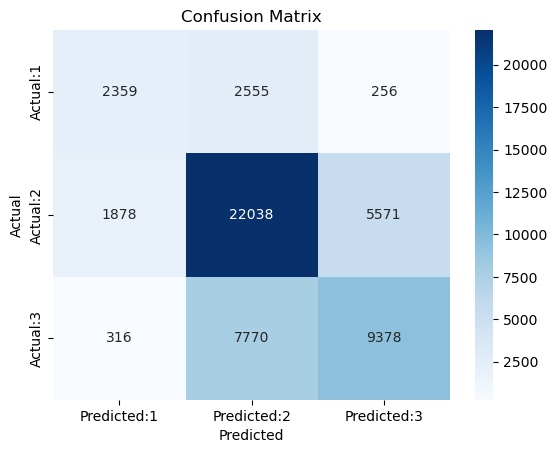

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      5170
           2       0.68      0.75      0.71     29487
           3       0.62      0.54      0.57     17464

    accuracy                           0.65     52121
   macro avg       0.61      0.58      0.59     52121
weighted avg       0.64      0.65      0.64     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7597
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6480




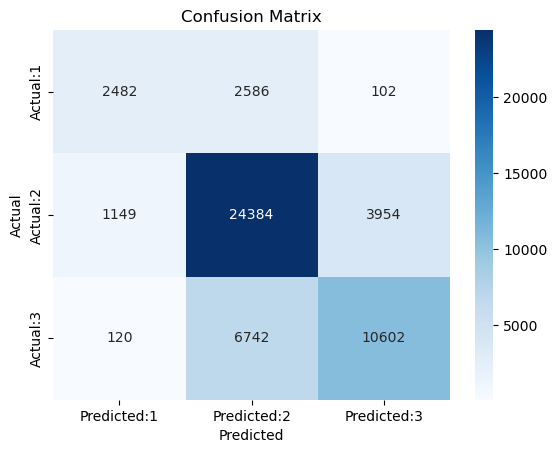

              precision    recall  f1-score   support

           1       0.66      0.48      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7189




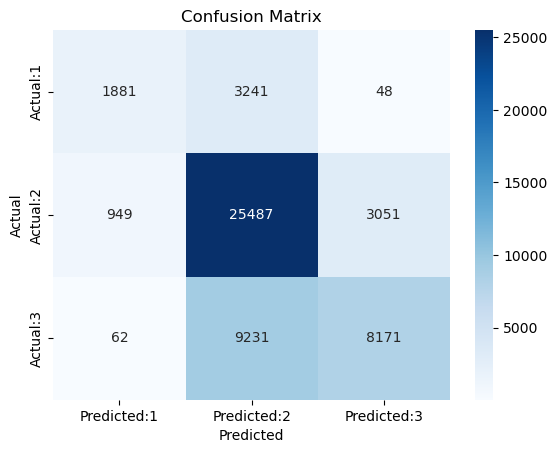

              precision    recall  f1-score   support

           1       0.65      0.36      0.47      5170
           2       0.67      0.86      0.76     29487
           3       0.73      0.47      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6819
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6819




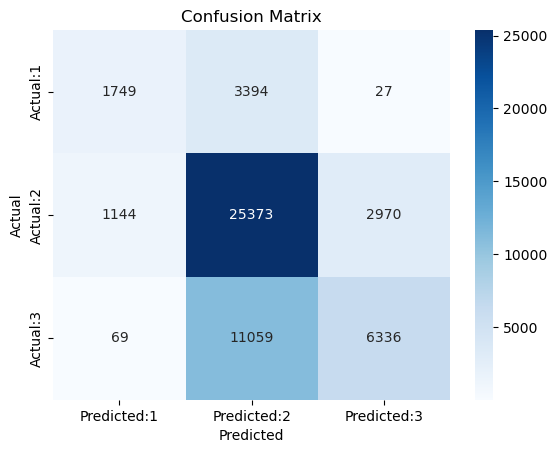

              precision    recall  f1-score   support

           1       0.59      0.34      0.43      5170
           2       0.64      0.86      0.73     29487
           3       0.68      0.36      0.47     17464

    accuracy                           0.64     52121
   macro avg       0.64      0.52      0.55     52121
weighted avg       0.65      0.64      0.62     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6446
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6419




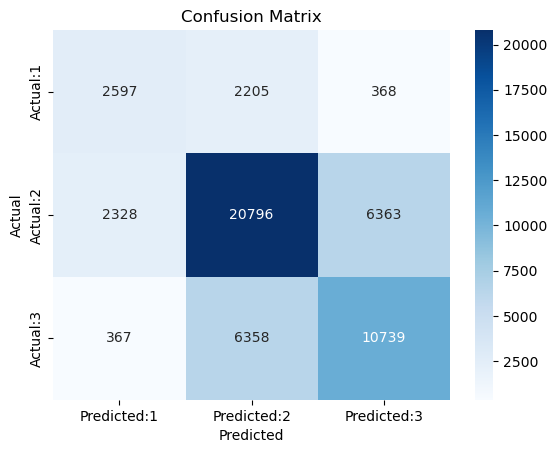

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.61      0.61      0.61     17464

    accuracy                           0.65     52121
   macro avg       0.60      0.61      0.61     52121
weighted avg       0.66      0.65      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6549




In [24]:
results_imbalanced_datasets = train_and_evaluate(X_train, y_train)

#### Results

In [26]:
results_imbalanced_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.986766,0.718866,103.52
2,Gradient Boosting Classifier,0.681898,0.681856,404.38
4,DecisionTree Classifier,0.986790,0.654861,6.16
0,KNeighborsClassifier,0.759675,0.648011,0.06
3,AdaBoost Classifier,0.644556,0.641929,33.41


### 2. For undersampled Datasets

#### Train the models

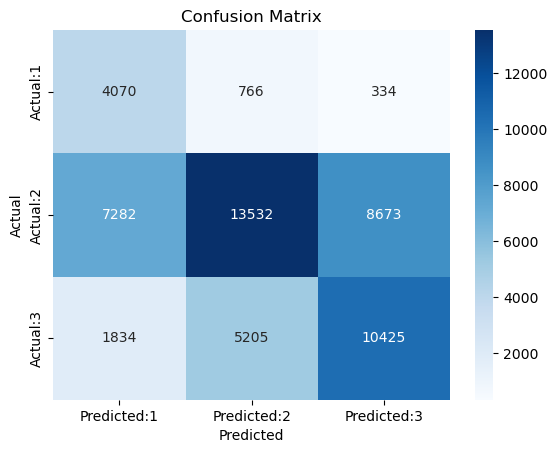

              precision    recall  f1-score   support

           1       0.31      0.79      0.44      5170
           2       0.69      0.46      0.55     29487
           3       0.54      0.60      0.57     17464

    accuracy                           0.54     52121
   macro avg       0.51      0.61      0.52     52121
weighted avg       0.60      0.54      0.55     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7334
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5377




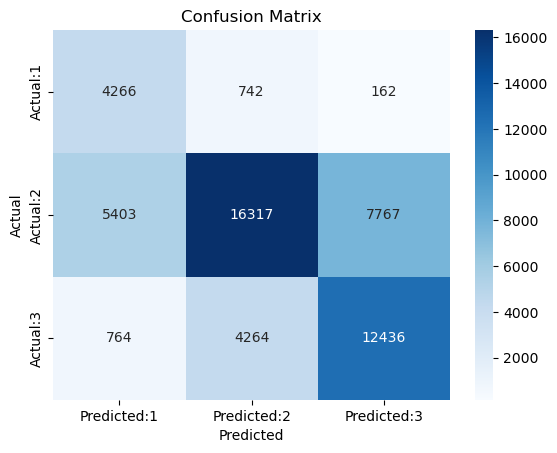

              precision    recall  f1-score   support

           1       0.41      0.83      0.55      5170
           2       0.77      0.55      0.64     29487
           3       0.61      0.71      0.66     17464

    accuracy                           0.63     52121
   macro avg       0.59      0.70      0.62     52121
weighted avg       0.68      0.63      0.64     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9955
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6335




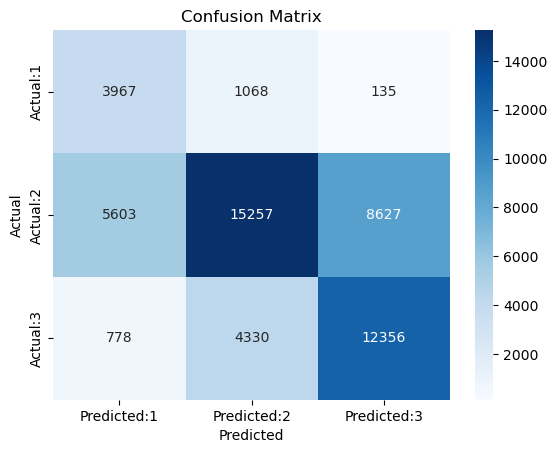

              precision    recall  f1-score   support

           1       0.38      0.77      0.51      5170
           2       0.74      0.52      0.61     29487
           3       0.59      0.71      0.64     17464

    accuracy                           0.61     52121
   macro avg       0.57      0.66      0.59     52121
weighted avg       0.65      0.61      0.61     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6725
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6059




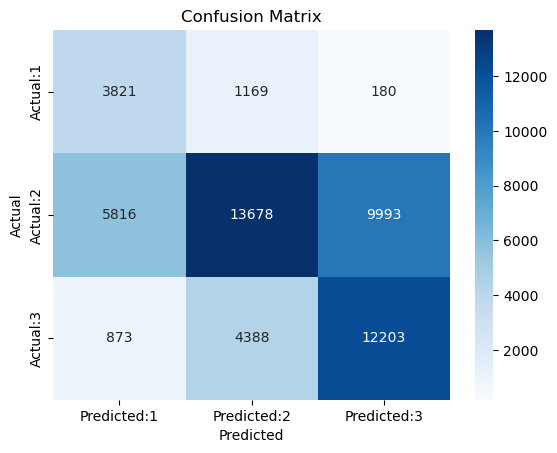

              precision    recall  f1-score   support

           1       0.36      0.74      0.49      5170
           2       0.71      0.46      0.56     29487
           3       0.55      0.70      0.61     17464

    accuracy                           0.57     52121
   macro avg       0.54      0.63      0.55     52121
weighted avg       0.62      0.57      0.57     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6353
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5699




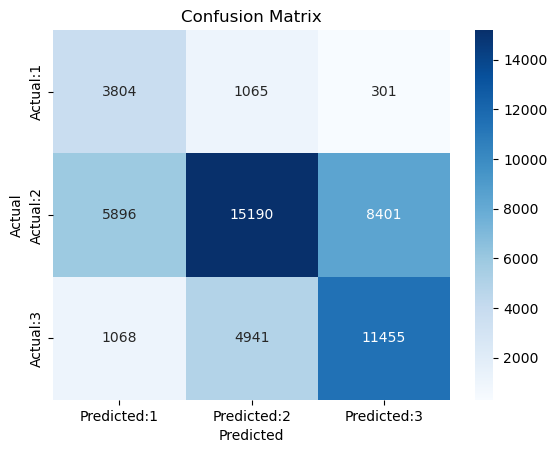

              precision    recall  f1-score   support

           1       0.35      0.74      0.48      5170
           2       0.72      0.52      0.60     29487
           3       0.57      0.66      0.61     17464

    accuracy                           0.58     52121
   macro avg       0.55      0.64      0.56     52121
weighted avg       0.63      0.58      0.59     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9955
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5842




In [36]:
results_undersample_datasets = train_and_evaluate(X_train_under_sample, y_train_under_sample)

#### Results

In [38]:
results_undersample_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.995456,0.633507,25.29
2,Gradient Boosting Classifier,0.672547,0.605898,90.83
4,DecisionTree Classifier,0.995456,0.584198,1.16
3,AdaBoost Classifier,0.635345,0.569866,7.47
0,KNeighborsClassifier,0.733370,0.537730,0.02


### 3. For oversampled Datasets

#### Train the models

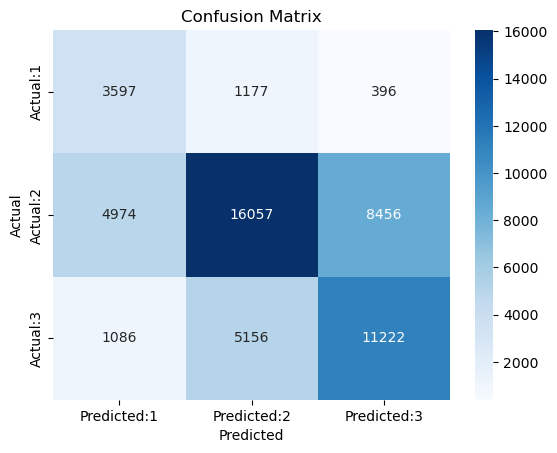

              precision    recall  f1-score   support

           1       0.37      0.70      0.49      5170
           2       0.72      0.54      0.62     29487
           3       0.56      0.64      0.60     17464

    accuracy                           0.59     52121
   macro avg       0.55      0.63      0.57     52121
weighted avg       0.63      0.59      0.60     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.8340
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5924




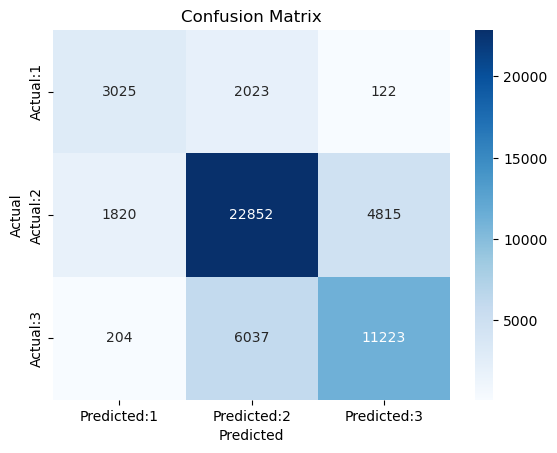

              precision    recall  f1-score   support

           1       0.60      0.59      0.59      5170
           2       0.74      0.77      0.76     29487
           3       0.69      0.64      0.67     17464

    accuracy                           0.71     52121
   macro avg       0.68      0.67      0.67     52121
weighted avg       0.71      0.71      0.71     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9913
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7118




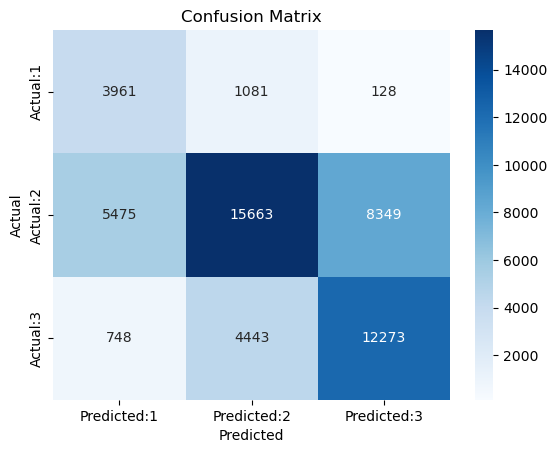

              precision    recall  f1-score   support

           1       0.39      0.77      0.52      5170
           2       0.74      0.53      0.62     29487
           3       0.59      0.70      0.64     17464

    accuracy                           0.61     52121
   macro avg       0.57      0.67      0.59     52121
weighted avg       0.65      0.61      0.62     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6689
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6120




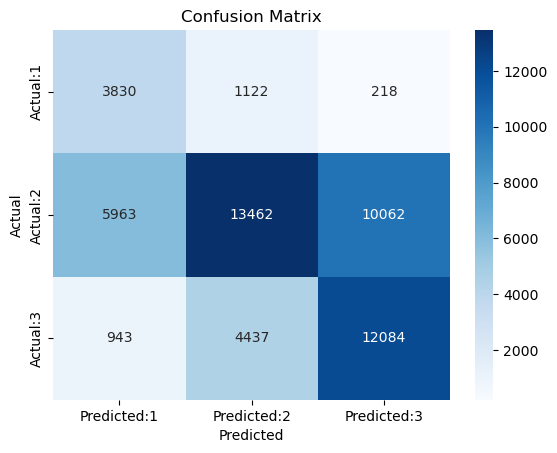

              precision    recall  f1-score   support

           1       0.36      0.74      0.48      5170
           2       0.71      0.46      0.56     29487
           3       0.54      0.69      0.61     17464

    accuracy                           0.56     52121
   macro avg       0.53      0.63      0.55     52121
weighted avg       0.62      0.56      0.57     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6304
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5636




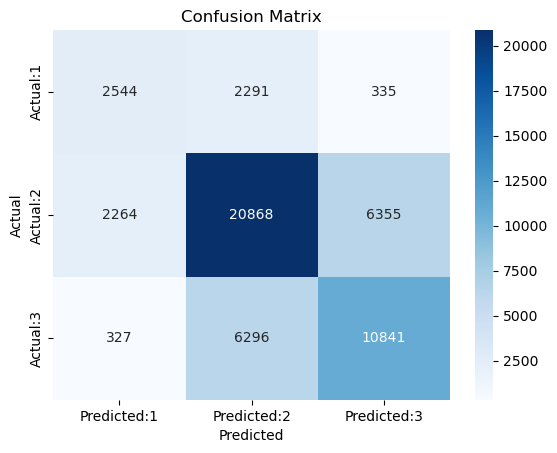

              precision    recall  f1-score   support

           1       0.50      0.49      0.49      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.62      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9913
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6572




In [39]:
results_oversample_datasets = train_and_evaluate(X_train_over_sample, y_train_over_sample)

#### Results

In [40]:
results_oversample_datasets

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.991305,0.711805,175.88
4,DecisionTree Classifier,0.991311,0.657182,12.07
2,Gradient Boosting Classifier,0.668856,0.611980,800.61
0,KNeighborsClassifier,0.833979,0.592391,0.16
3,AdaBoost Classifier,0.630440,0.563612,57.14


### 4. For SMOTE 

#### Train the models

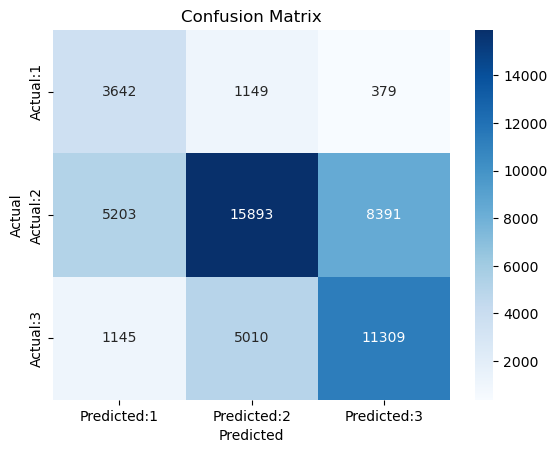

              precision    recall  f1-score   support

           1       0.36      0.70      0.48      5170
           2       0.72      0.54      0.62     29487
           3       0.56      0.65      0.60     17464

    accuracy                           0.59     52121
   macro avg       0.55      0.63      0.57     52121
weighted avg       0.63      0.59      0.60     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.8382
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5918




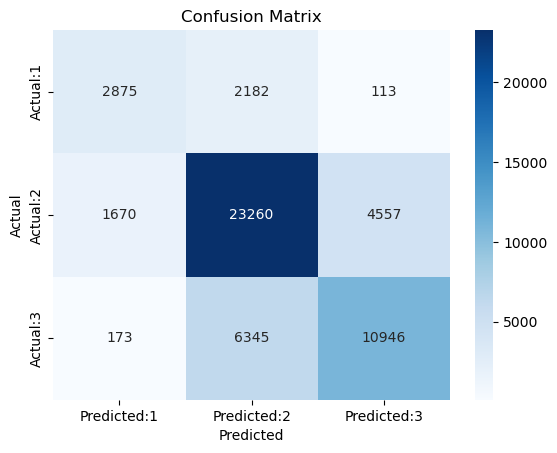

              precision    recall  f1-score   support

           1       0.61      0.56      0.58      5170
           2       0.73      0.79      0.76     29487
           3       0.70      0.63      0.66     17464

    accuracy                           0.71     52121
   macro avg       0.68      0.66      0.67     52121
weighted avg       0.71      0.71      0.71     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9922
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7114




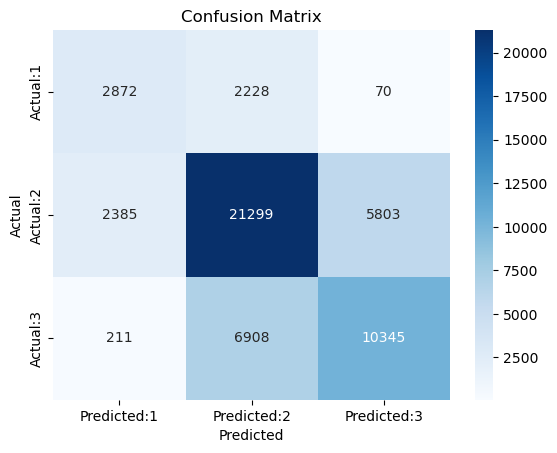

              precision    recall  f1-score   support

           1       0.53      0.56      0.54      5170
           2       0.70      0.72      0.71     29487
           3       0.64      0.59      0.61     17464

    accuracy                           0.66     52121
   macro avg       0.62      0.62      0.62     52121
weighted avg       0.66      0.66      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7446
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6622




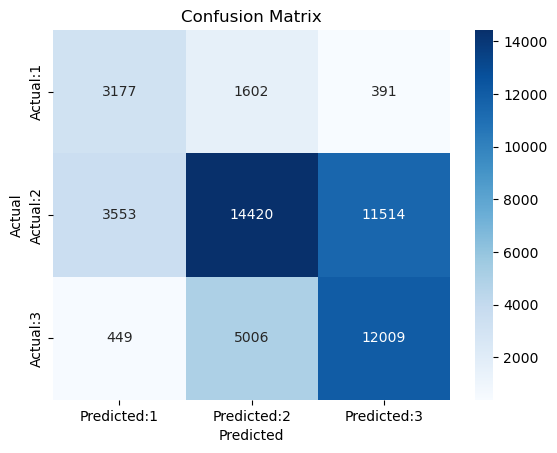

              precision    recall  f1-score   support

           1       0.44      0.61      0.51      5170
           2       0.69      0.49      0.57     29487
           3       0.50      0.69      0.58     17464

    accuracy                           0.57     52121
   macro avg       0.54      0.60      0.56     52121
weighted avg       0.60      0.57      0.57     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6538
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.5680




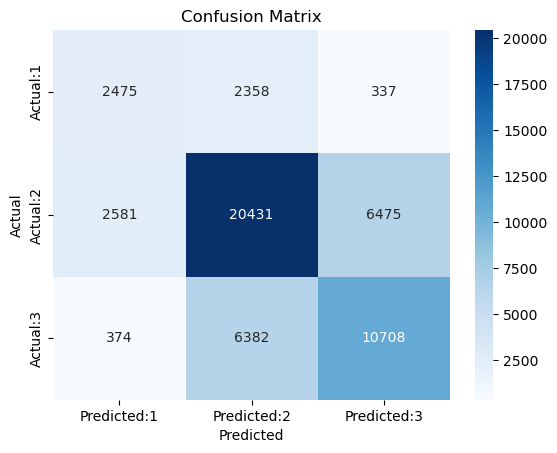

              precision    recall  f1-score   support

           1       0.46      0.48      0.47      5170
           2       0.70      0.69      0.70     29487
           3       0.61      0.61      0.61     17464

    accuracy                           0.64     52121
   macro avg       0.59      0.59      0.59     52121
weighted avg       0.65      0.64      0.65     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9922
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6449




In [41]:
results_smote = train_and_evaluate(X_train_smote, y_train_smote)

#### Results

In [42]:
results_smote

,Model Name,Train Micro Averaged F1-Score,Val Micro Averaged F1-Score,Time
1,Random Forest,0.992206,0.711441,210.84
2,Gradient Boosting Classifier,0.744606,0.662228,795.95
4,DecisionTree Classifier,0.992215,0.644922,13.04
0,KNeighborsClassifier,0.838211,0.591777,0.10
3,AdaBoost Classifier,0.653796,0.568024,61.14
